In [1]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

import sys
import glob
import os

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import pickle

In [28]:
stop = stopwords.words('english')
stop = stop + [u'said',u'back',u'know',u'little']

In [29]:
tokenizer = RegexpTokenizer(r'\w+')

In [30]:
texts = []
path = '/home/amn34/metis/stuff/noirs/chandler'
for books in sorted(glob.glob(os.path.join(path, '*.txt'))):
    doc = open(books).read()
    doc = doc.decode('utf-8')
    doc = doc.lower()
    docwords = tokenizer.tokenize(doc)
    stopped = [w for w in docwords if not w in stop]
    #p_stem = PorterStemmer()
    #stemmed_words = [p_stem.stem(i) for i in stopped]
    texts.append(stopped)


In [82]:
output = open('texts.pkl', 'wb')

In [83]:
pickle.dump(texts, output)

In [84]:
output.close()

In [70]:
#for i in texts: print i[0:50], '\n'

In [2]:
textpickle = open('texts.pkl', 'rb')

texts = pickle.load(textpickle)

#### words across corpus

In [91]:
together = [item for sublist in texts for item in sublist]

In [92]:
len(together)

245020

In [93]:
from nltk import Text

In [94]:
from nltk import FreqDist

In [95]:
books = nltk.Text(together)

In [153]:
import pylab

In [154]:
from nltk.draw import dispersion_plot

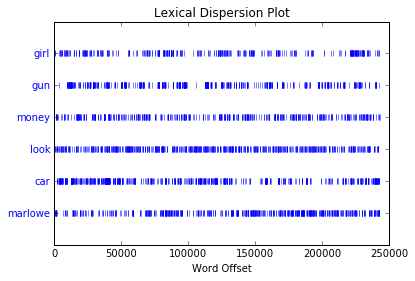

In [155]:
books.dispersion_plot(['girl','gun','money','look','car','marlowe'])

In [145]:
bookwords = [i for i in books]

In [77]:
books.similar('man')

guy one woman boy girl door think hand way fellow go let car tall good
leaned side got thing kind


In [78]:
books.similar('gun')

hand right around away money hat wallet card head one slowly glass
bottle came left think held photostat went hard


In [79]:
books.similar('girl')

man somebody around one morning right see wearily guy thing son way
voice check anybody hand well looked left cute


In [80]:
books.common_contexts(['man','gun'])

No common contexts were found


In [96]:
import nltk
 
def get_all_phases_containing_tar_wrd(target_word, left_margin = 10, right_margin = 10):
    """
        Function to get all the phases that contain the target word in a text/passage tar_passage.
        Workaround to save the output given by nltk Concordance function
         
        str target_word, str tar_passage int left_margin int right_margin --> list of str
        left_margin and right_margin allocate the number of words/pununciation before and after target word
        Left margin will take note of the beginning of the text
    """
     
    ## Create list of tokens using nltk function
    #tokens = nltk.word_tokenize(tar_passage)
     
    ## Create the text of tokens
    #text = nltk.Text(tokens)
 
    ## Collect all the index or offset position of the target word
    c = nltk.ConcordanceIndex(books.tokens, key = lambda s: s.lower())
 
    ## Collect the range of the words that is within the target word by using text.tokens[start;end].
    ## The map function is use so that when the offset position - the target range < 0, it will be default to zero
    concordance_txt = ([books.tokens[map(lambda x: x-5 if (x-left_margin)>0 else 0,[offset])[0]:offset+right_margin]
                        for offset in c.offsets(target_word)])
                         
    ## join the sentences for each of the target phrase and return it
    return [''.join([x+' ' for x in con_sub]) for con_sub in concordance_txt]

In [97]:
similes = get_all_phases_containing_tar_wrd('like')

In [98]:
len(similes)

1953

In [42]:
import random

In [107]:
random.sample(similes, 20)

[u'realito mile west better try like kicked door hard kept kicking another voice made heard ',
 u'stared say anything like chum like oh sure husband record says three white steps big ',
 u'right hand snapped blackjack coiled like wounded snake went around desk grinning without anything grin ',
 u'around feel like cigarette felt like hind leg elephant sharp toenails stuck hand shook hand ',
 u'man waist big chest looked like bum wore brown suit coat small shoulders trousers probably ',
 u'neck gottum car big car like big cars gottum car come car indian threateningly come ',
 u'french casually hell captain captain like small town cops saying hell french maglashan clamped teeth ',
 u'bag gun given mavis think like one exactly like played turned around shot dead one ',
 u'number times call time nothing like happened knowledge well think might almost throw shoplifting angle ',
 u'thinking pulling gun mr palermo like hell mr palermo snarled voice suddenly furious face suddenly ',
 u'tackle c

In [19]:
books.concordance('man')

Displaying 25 of 1402 matches:
hot hard coal black eyes general look man would pay get along thought might gen
 holding seem bother tall thin silver man sixty close little past blue eyes rem
s could skin smooth bright moved like man sound muscles walked slowly across fl
chair wheel chair old obviously dying man watched us come black eyes fire died 
er stood front mr marlowe general old man move speak even nod looked lifelessly
acks legs sat took hat deft scoop old man dragged voice bottom well brandy norr
 brandy beneath may take coat sir hot man blood veins stood peeled coat got han
t automatically cigarette stopped old man caught gesture smiled faintly may smo
dowed comers mouth nice state affairs man indulge vices proxy dryly looking dul
soft wet heat like pall around us old man nodded neck afraid weight head butler
d shut behind jungle sipped drink old man licked lips watching drawing one lip 
orney investigator chief investigator man named bernie ohls called told wanted 
 policeme

In [81]:
books.collocations()

bay city; shook head; eddie mars; last night; los angeles; mrs
murdock; living room; bill chess; mavis weld; miss fromsett; long
time; philip marlowe; thousand dollars; door opened; could see; terry
lennox; harlan potter; new york; say anything; idle valley


In [146]:
books.count('gun') + books.count('guns')

700

In [83]:
fd = nltk.FreqDist(books)

In [84]:
fd

FreqDist({u'fawn': 27,
          u'raining': 6,
          u'tommyguns': 1,
          u'cussed': 1,
          u'yellow': 115,
          u'narcotic': 7,
          u'four': 200,
          u'gag': 18,
          u'woods': 6,
          u'clotted': 3,
          u'spiders': 3,
          u'knucks': 3,
          u'railing': 34,
          u'towns': 7,
          u'payoff': 4,
          u'looking': 529,
          u'canes': 1,
          u'fiddling': 2,
          u'attracted': 1,
          u'electricity': 2,
          u'chatter': 2,
          u'plowhorse': 1,
          u'unanswered': 1,
          u'sunlit': 1,
          u'originality': 1,
          u'fingernails': 29,
          u'opener': 6,
          u'lord': 2,
          u'immature': 1,
          u'flicking': 6,
          u'meadows': 2,
          u'shaving': 5,
          u'sinking': 1,
          u'swivel': 13,
          u'callin': 1,
          u'magoozium': 1,
          u'dell': 1,
          u'knelt': 2,
          u'anaemic': 1,
          u'forties

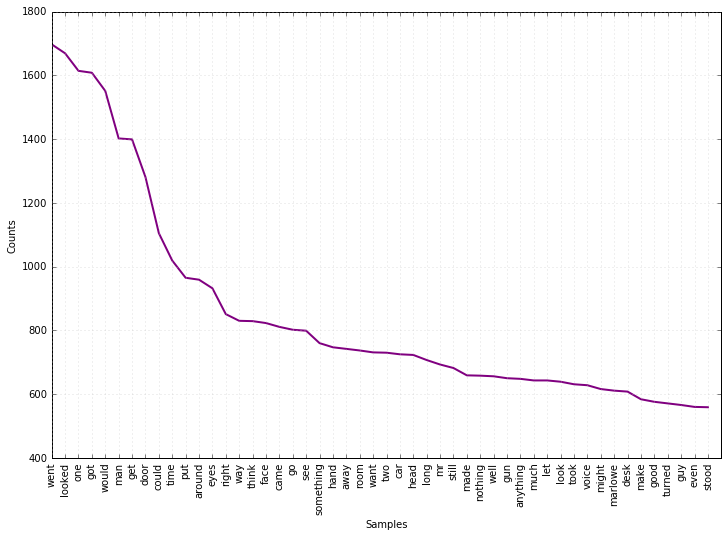

In [85]:
plt.figure(figsize = (12,8))
fd.plot(50,cumulative=False,color='purple')

In [25]:
fd.hapaxes()

[u'tommyguns',
 u'cussed',
 u'prices',
 u'peekin',
 u'increase',
 u'canes',
 u'camarillo',
 u'rupture',
 u'plowhorse',
 u'unanswered',
 u'sunlit',
 u'originality',
 u'clanked',
 u'immature',
 u'sinking',
 u'callin',
 u'dell',
 u'forties',
 u'broiler',
 u'yachting',
 u'dissolutely',
 u'jarringly',
 u'happenings',
 u'festered',
 u'specially',
 u'panther',
 u'shoelaces',
 u'tumed',
 u'shrugging',
 u'milled',
 u'tensely',
 u'unlisted',
 u'medically',
 u'automatics',
 u'9521',
 u'herd',
 u'repotting',
 u'finked',
 u'cult',
 u'confronts',
 u'natured',
 u'skipouts',
 u'uplifting',
 u'climber',
 u'burrow',
 u'_would_',
 u'classification',
 u'scold',
 u'lynne',
 u'shoddy',
 u'ducky',
 u'browse',
 u'42',
 u'swap',
 u'intake',
 u'morally',
 u'grimed',
 u'pompadour',
 u'aloofness',
 u'sweeter',
 u'plunges',
 u'mindedness',
 u'digit',
 u'caution',
 u'rayon',
 u'newscameramen',
 u'hog',
 u'magoozium',
 u'cutback',
 u'backstairs',
 u'canaries',
 u'dignified',
 u'terrycloth',
 u'hoot',
 u'despondent',

In [26]:
books.count('dame')

26

In [99]:
books.count('girl')

397

In [100]:
books.count('girls')

57

In [101]:
books.count('gun')

650

In [102]:
books.count('guns')

48

In [103]:
books.count('cigarette'), books.count('cigarettes')

(388, 92)

#### per book

In [3]:
sent = pd.read_pickle('sentiment.pkl')

In [4]:
def chunker(seq, size):
    return (seq[pos:pos + size] for pos in xrange(0, len(seq), size))

In [5]:
from collections import Counter

In [6]:
woman = [u'she',u'her',u'girl',u'woman',u'blonde']
uniwoman = [unicode(i) for i in woman]

In [7]:
wordcounts=[]
wordprop = []
lengths = []
fds = []
sentscore = []
sentpages = []
womanpages = []
poscount = []
negcount = []

for i in texts:
    lengths.append(len(i))
    book = nltk.Text(i)
    wordcounts.append([book.count('gun'), book.count('girl'), book.count('cigarette')])
    wordprop.append([(book.count('gun')/float(len(i))), (book.count('girl')/float(len(i))),(book.count('cigarette')/float(len(i)))])
    fd = nltk.FreqDist(book)
    fds.append(fd)
    
    #bookwords = [i.encode('utf-8') for i in book]
    bookwords = [i for i in book]
    words = pd.DataFrame(columns=['word'])
    words.word = bookwords
    booksentiment = pd.merge(words, sent, how='left', on='word')
    booksentiment.fillna(0, inplace=True)
    sentscore.append(sum(booksentiment.sentiment))
    
    pagesent = []
    for chunk in chunker(booksentiment,150):
        pagesent.append(sum(chunk.sentiment))
    sentpages.append(pagesent)
    
    pagewoman = []
    for chunk in chunker(bookwords,150):
        womantmp = 0
        for word in chunk:
            if word in uniwoman:
                womantmp+=1
        pagewoman.append(womantmp)
    womanpages.append(pagewoman)
    
    poscount.append(Counter(booksentiment.sentiment.values)[1])
    negcount.append(Counter(booksentiment.sentiment.values)[-1])

In [10]:
lengths

[31010, 36890, 31999, 33179, 35338, 54063, 22541]

In [92]:
#pre stop word lengths: [31642, 37630, 32703, 33922, 36076, 55034, 22985]

In [11]:
poscount

[4325, 5271, 4949, 4725, 5265, 8525, 3544]

In [12]:
posprop = [i/float(j) for i,j in zip(poscount,lengths)]

In [ ]:
#pre stop pos: [4766, 5763, 5463, 5239, 5745, 9284, 3897]
#pre stop neg: [3828, 4418, 3777, 3992, 4362, 6848, 2526]

In [13]:
negcount

[3637, 4170, 3587, 3763, 4104, 6636, 2435]

In [14]:
negprop = [i/float(j) for i,j in zip(negcount,lengths)]

In [15]:
negprop

[0.11728474685585295,
 0.11303876389265384,
 0.11209725303915748,
 0.11341511196841375,
 0.11613560473145056,
 0.12274568558903501,
 0.10802537598154474]

In [16]:
posprop

[0.13947113834247016,
 0.1428842504743833,
 0.15466108315884872,
 0.14240935531510895,
 0.14898975606995302,
 0.15768640290032,
 0.15722461292755424]

In [33]:
gun = [i[0] for i in wordprop]
girl = [i[1] for i in wordprop]
cig = [i[2] for i in wordprop]

In [34]:
gun

[0.002875924404272802,
 0.0024980069093808134,
 0.004128061645720576,
 0.0028300218147514888,
 0.002300698525335403,
 0.0019442526438201838,
 0.0019142919295192518]

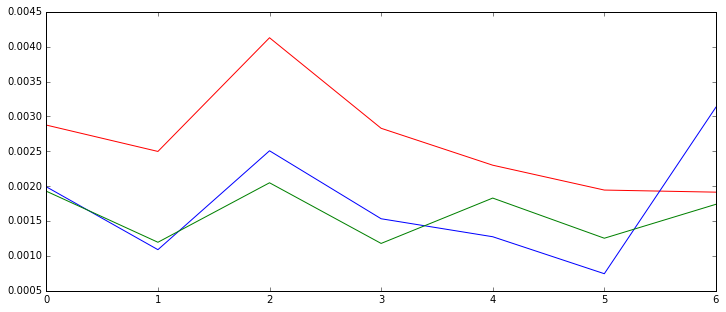

In [35]:
plt.figure(figsize=(12,5))
plt.plot(range(len(gun)),gun,color='r')
plt.plot(range(len(girl)),girl,color='b')
plt.plot(range(len(cig)),cig,color='g')

In [17]:
normlengths = [(i-np.mean(lengths))/(max(lengths)-min(lengths)) for i in lengths]
normsent = [(i-np.mean(sentscore))/(max(sentscore)-min(sentscore)) for i in sentscore]

In [18]:
normlengths

[-0.12666890244455126,
 0.059867484840519479,
 -0.09529398968520858,
 -0.057859816726639965,
 0.010632030237385161,
 0.60466159688924737,
 -0.39533840311075263]

In [19]:
normsent

[-0.41108599976210308,
 -0.067205899845367012,
 0.15011300107053641,
 -0.18294278577376002,
 -0.017247531818722548,
 0.58891400023789697,
 -0.060544784108481083]

([<matplotlib.axis.XTick at 0x7fd72cf827d0>,
 <a list of 7 Text xticklabel objects>)

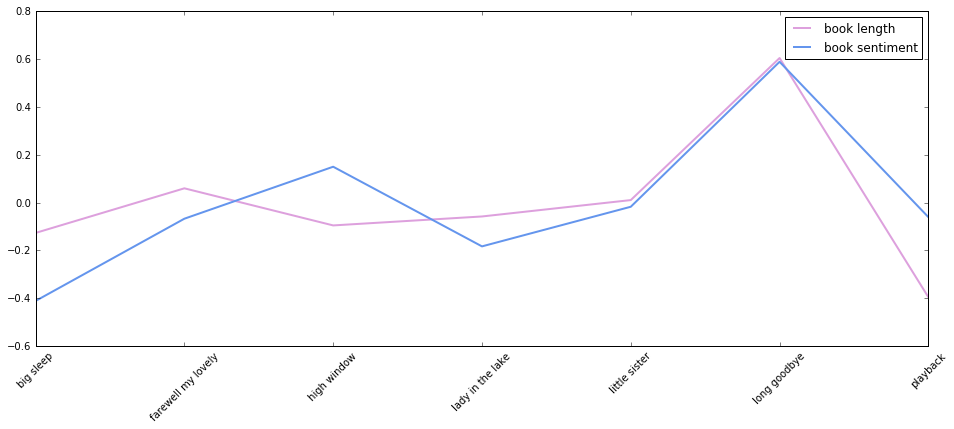

In [26]:
x=range(1,8)
plt.figure(figsize=(16,6))
plt.plot(x,normlengths,color='plum', linewidth=2, label='book length')
plt.plot(x,normsent,color='cornflowerblue', linewidth=2, label ='book sentiment')
plt.legend(loc='best')
labels = ['big sleep', 'farewell my lovely', 'high window', 'lady in the lake', 'little sister', 'long goodbye', 'playback']
plt.xticks(x, labels, rotation=45)

In [37]:
gunabs = [i[0] for i in wordcounts]
girlabs = [i[1] for i in wordcounts]
cigabs = [i[2] for i in wordcounts]

In [38]:
wordcounts

[[91, 63, 61],
 [94, 41, 45],
 [135, 82, 67],
 [96, 52, 40],
 [83, 46, 66],
 [107, 41, 69],
 [44, 72, 40]]

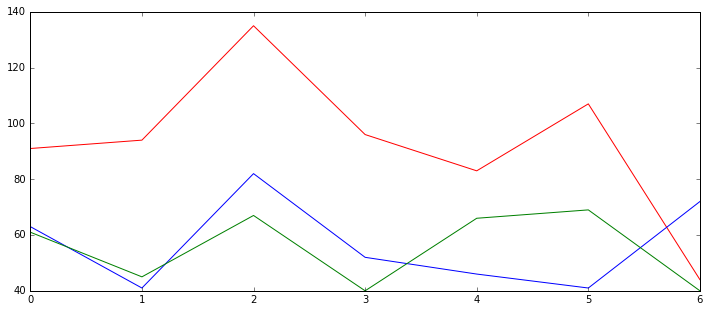

In [39]:
plt.figure(figsize=(12,5))
plt.plot(range(len(gunabs)),gunabs,color='r')
plt.plot(range(len(girlabs)),girlabs,color='b')
plt.plot(range(len(cigabs)),cigabs,color='g')

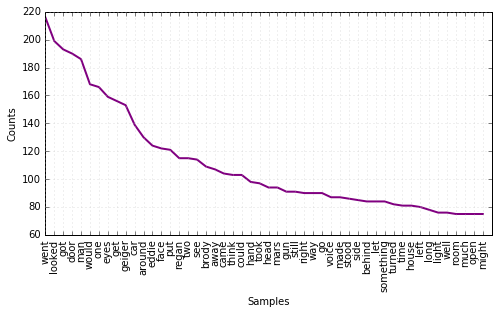

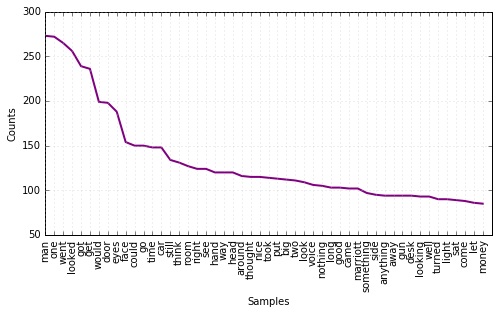

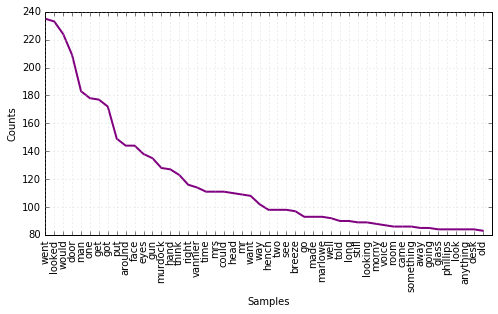

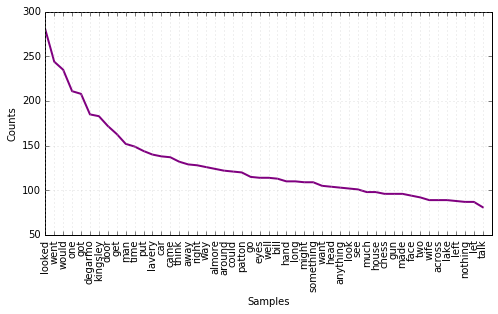

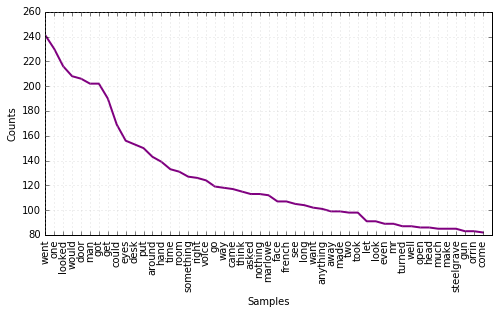

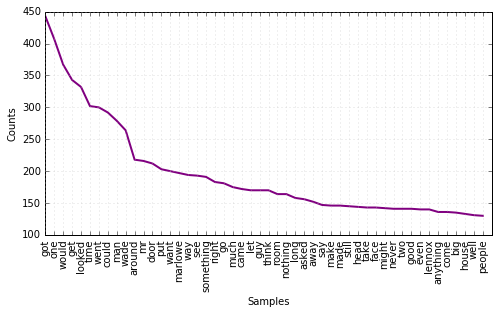

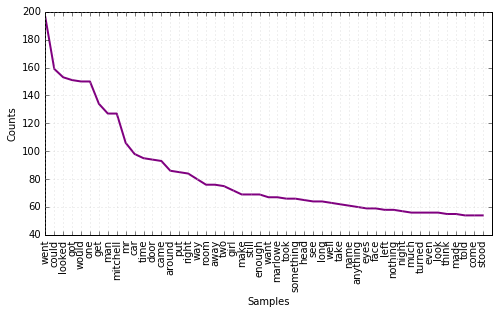

In [106]:
for i in fds:
    plt.figure(figsize=(8,4))
    i.plot(50,cumulative=False,color='purple')

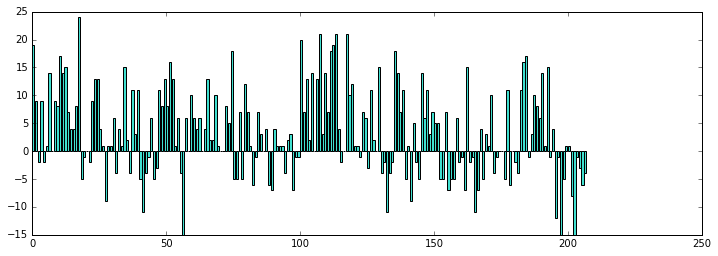

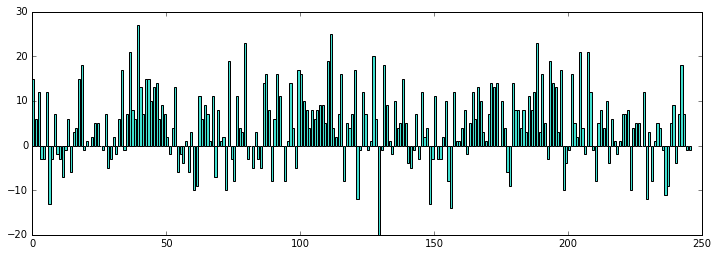

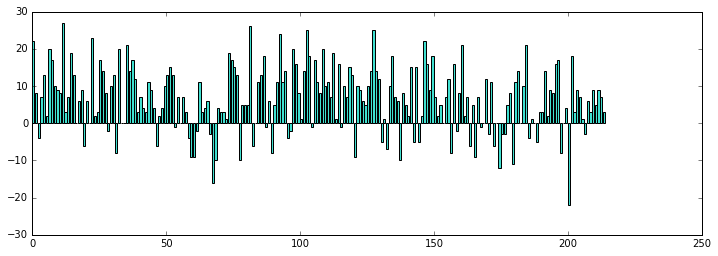

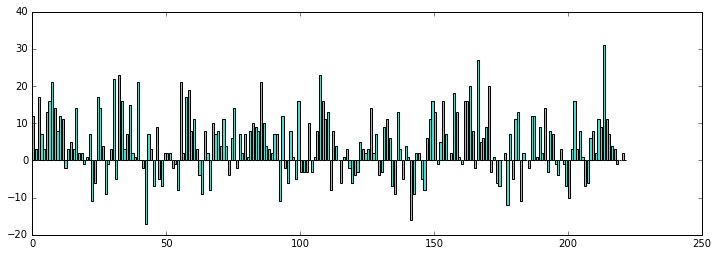

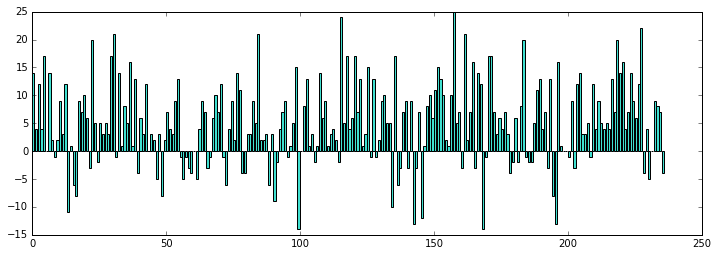

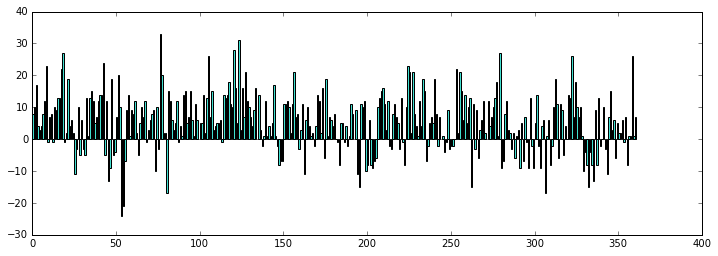

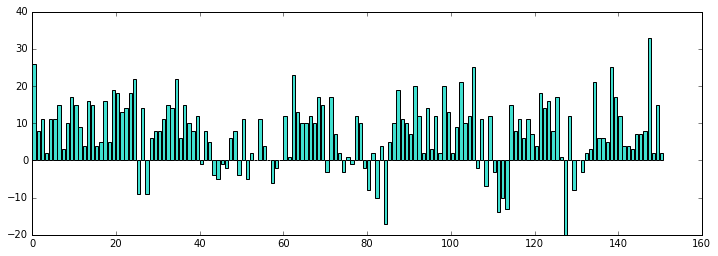

In [31]:
for i in sentpages:
    plt.figure(figsize=(12,4))
    plt.bar(range(len(i)),i,color='turquoise')

#### sentiment transforms

In [8]:
import scipy

In [9]:
from scipy import fftpack

#### sp0

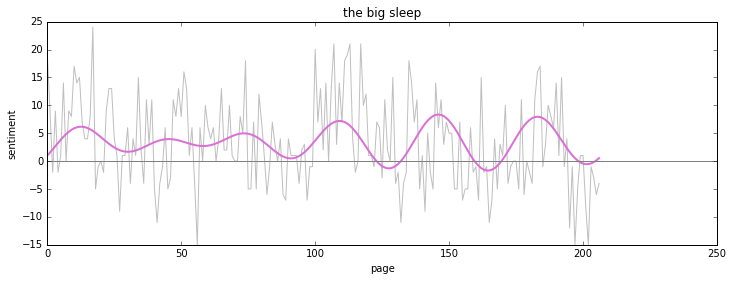

In [110]:
x = range(len(sentpages[0]))
cN = len(sentpages[0])
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(sentpages[0])

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/10)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

plt.figure(figsize=(12,4))
plt.plot(x, cy, color='grey', alpha=0.5)
plt.plot(x, cy2, linewidth=2, color='orchid')
plt.axhline(y=0, color='gray')

plt.xlabel('page')
plt.ylabel('sentiment')
plt.title('the big sleep')

#### sp1

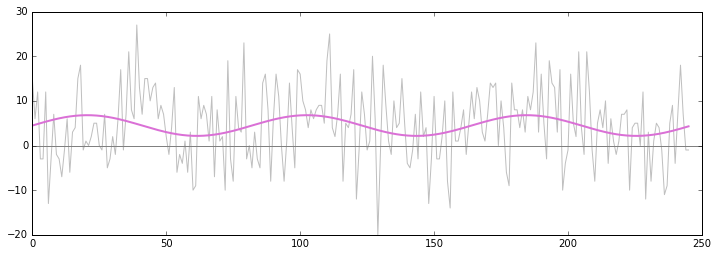

In [84]:
x = range(len(sentpages[1]))
cN = len(sentpages[1])
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(sentpages[1])

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/15)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

plt.figure(figsize=(12,4))
plt.plot(x, cy, color='grey', alpha=0.5)
plt.plot(x, cy2, linewidth=2, color='orchid')
plt.axhline(y=0, color='gray')

#### sp2

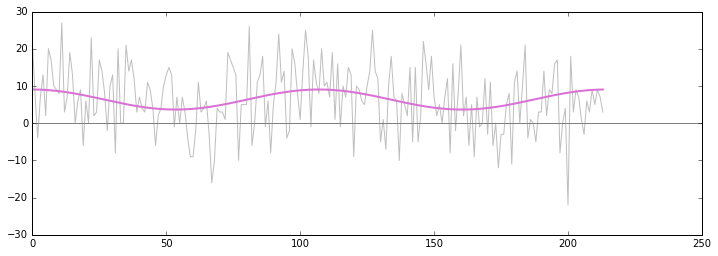

In [90]:
x = range(len(sentpages[2]))
cN = len(sentpages[2])
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(sentpages[2])

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/23)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

plt.figure(figsize=(12,4))
plt.plot(x, cy, color='grey', alpha=0.5)
plt.plot(x, cy2, linewidth=2, color='orchid')
plt.axhline(y=0, color='gray')

#### sp3

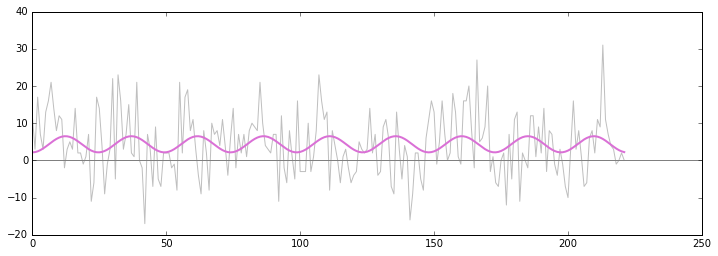

In [97]:
x = range(len(sentpages[3]))
cN = len(sentpages[3])
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(sentpages[3])

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/16)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

plt.figure(figsize=(12,4))
plt.plot(x, cy, color='grey', alpha=0.5)
plt.plot(x, cy2, linewidth=2, color='orchid')
plt.axhline(y=0, color='gray')

#### sp4

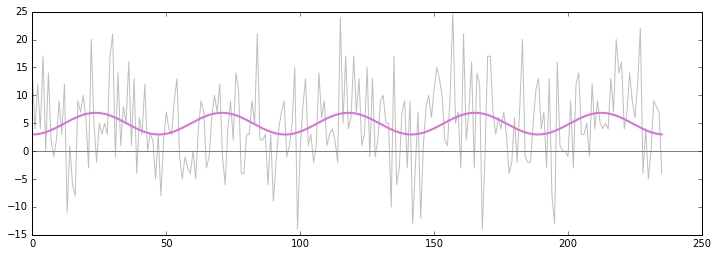

In [105]:
x = range(len(sentpages[4]))
cN = len(sentpages[4])
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(sentpages[4])

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/30)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

plt.figure(figsize=(12,4))
plt.plot(x, cy, color='grey', alpha=0.5)
plt.plot(x, cy2, linewidth=2, color='orchid')
plt.axhline(y=0, color='gray')

#### sp5

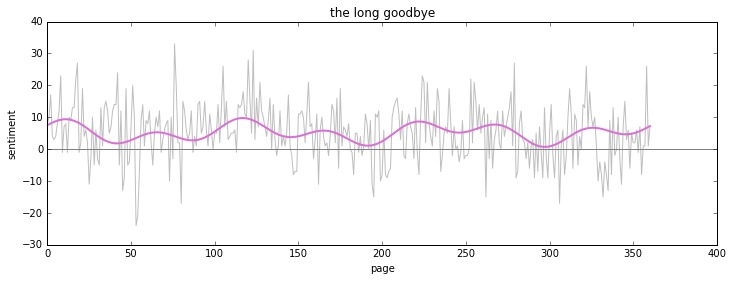

In [11]:
x = range(len(sentpages[5]))
cN = len(sentpages[5])
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(sentpages[5])

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/22)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

plt.figure(figsize=(12,4))
plt.plot(x, cy, color='grey', alpha=0.5)
plt.plot(x, cy2, linewidth=2, color='orchid')
plt.axhline(y=0, color='gray')

plt.xlabel('page')
plt.ylabel('sentiment')
plt.title('the long goodbye')

#### sp6

In [78]:
sentpages[6]

[26.0,
 8.0,
 11.0,
 2.0,
 11.0,
 11.0,
 15.0,
 3.0,
 10.0,
 17.0,
 15.0,
 9.0,
 4.0,
 16.0,
 15.0,
 4.0,
 5.0,
 16.0,
 5.0,
 19.0,
 18.0,
 13.0,
 14.0,
 18.0,
 22.0,
 -9.0,
 14.0,
 -9.0,
 6.0,
 8.0,
 8.0,
 11.0,
 15.0,
 14.0,
 22.0,
 6.0,
 15.0,
 10.0,
 8.0,
 12.0,
 -1.0,
 8.0,
 5.0,
 -4.0,
 -5.0,
 -1.0,
 -2.0,
 6.0,
 8.0,
 -4.0,
 11.0,
 -5.0,
 2.0,
 0.0,
 11.0,
 4.0,
 0.0,
 -6.0,
 -2.0,
 0.0,
 12.0,
 1.0,
 23.0,
 13.0,
 10.0,
 10.0,
 12.0,
 10.0,
 17.0,
 15.0,
 -3.0,
 17.0,
 7.0,
 2.0,
 -3.0,
 1.0,
 -1.0,
 12.0,
 10.0,
 -2.0,
 -8.0,
 2.0,
 -10.0,
 4.0,
 -17.0,
 5.0,
 10.0,
 19.0,
 11.0,
 10.0,
 7.0,
 20.0,
 12.0,
 2.0,
 14.0,
 3.0,
 12.0,
 2.0,
 20.0,
 13.0,
 2.0,
 9.0,
 21.0,
 10.0,
 12.0,
 25.0,
 -2.0,
 11.0,
 -7.0,
 12.0,
 -3.0,
 -14.0,
 -10.0,
 -13.0,
 15.0,
 8.0,
 11.0,
 6.0,
 11.0,
 7.0,
 4.0,
 18.0,
 14.0,
 16.0,
 8.0,
 17.0,
 1.0,
 -20.0,
 12.0,
 -8.0,
 0.0,
 -3.0,
 2.0,
 3.0,
 21.0,
 6.0,
 6.0,
 5.0,
 25.0,
 17.0,
 12.0,
 4.0,
 4.0,
 3.0,
 7.0,
 7.0,
 8.0,
 33.0,
 2.0,
 15.0

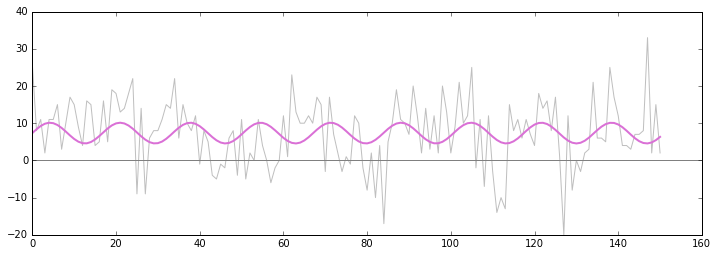

In [107]:
x = range(len(sentpages[6]))
cN = len(sentpages[6])
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(sentpages[6])

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/36)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

plt.figure(figsize=(12,4))
plt.plot(x, cy, color='grey', alpha=0.5)
plt.plot(x, cy2, linewidth=2, color='orchid')
plt.axhline(y=0, color='gray')

In [172]:
len(completeposwords), len(completenegwords)

(34651, 28332)